In [289]:
import sys
sys.path.append('../')
import os
import random
import zipfile
from matplotlib import pyplot as plt
from PIL import Image
import nibabel as nib
import numpy as np
from Data_Preprocessing.mri_scale import get_percentiles, clip_image_intensity

**Shows a random image from the dataset**

In [2]:
slices = ['26', '23', '43']

1335884.zip


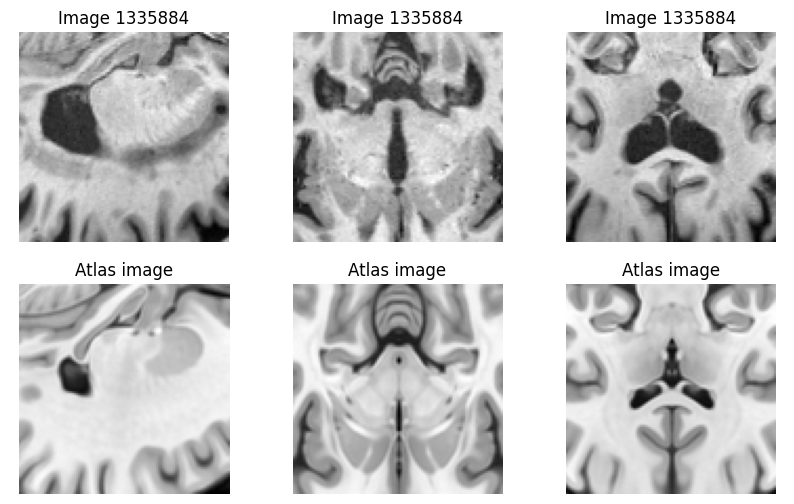

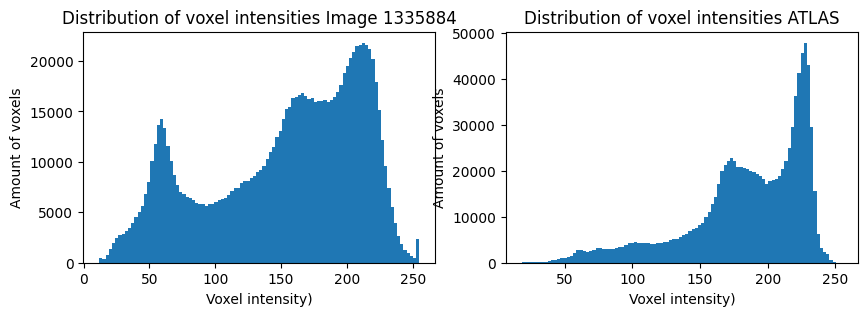

In [318]:
for subdir, dirs, files in os.walk('/Volumes/Extreme SSD/ADNI_SLICED/'):

    images = files

    num_of_images = len(files)

    image = files[random.randint(0, num_of_images)]


    print(image)

    image_archive1 = zipfile.ZipFile('/Volumes/Extreme SSD/ADNI_SLICED/'+image)

    image_archive1.extract('saggital/'+slices[0]+'.png', 'temp_folder_saggital')

    image_archive1.extract('axial/'+slices[1]+'.png', 'temp_folder_axial')

    image_archive1.extract('coronal/'+slices[2]+'.png', 'temp_folder_coronal')

    image1 = Image.open(r"temp_folder_saggital/saggital/"+slices[0]+'.png')
 
    image2 = Image.open(r"temp_folder_axial/axial/"+slices[1]+'.png')

    image3 = Image.open(r"temp_folder_coronal/coronal/"+slices[2]+'.png')

    atlas1 = Image.open(r"/Volumes/Extreme SSD/ATLAS_SLICED/mni_icbm152_t1_tal_nlin_sym_/saggital/"+slices[0]+'.png')
 
    atlas2 = Image.open(r"/Volumes/Extreme SSD/ATLAS_SLICED/mni_icbm152_t1_tal_nlin_sym_/axial/"+slices[1]+'.png')

    atlas3 = Image.open(r"/Volumes/Extreme SSD/ATLAS_SLICED/mni_icbm152_t1_tal_nlin_sym_/coronal/"+slices[2]+'.png')

    images = [image1, image2, image3, atlas1, atlas2, atlas3]

    fig = plt.figure(figsize=(10, 6))
    plt.axis('off')

    for i in range(0, 3):
        fig.add_subplot(2,3, i+1)
        plt.imshow(images[i], cmap = 'grey')
        plt.title('Image '+str(image)[:-4])
        plt.axis('off')

    for i in range(3, 6):
        fig.add_subplot(2,3, i+1)
        plt.imshow(images[i], cmap = 'grey')
        plt.title('Atlas image')
        plt.axis('off')

    plt.show()

    img_nifti = nib.load('/Volumes/Extreme SSD/ADNI_PROCESSED/' + image[:-4]+'.nii.gz')

    img_arr = np.array(img_nifti.dataobj)

    atlas_nifti = nib.load('/Volumes/Extreme SSD/Download/mni_icbm152_nlin_sym_09c/mni_icbm152_t1_tal_nlin_sym_09c.nii')

    atlas_arr = np.array(atlas_nifti.dataobj)

    lower_threshold, upper_threshold = get_percentiles(img_arr)

    img_arr = clip_image_intensity(img_arr, lower_threshold, upper_threshold)

    center_dim = [int(np.ceil(x/2)) for x in atlas_arr.shape]
    lower_dim = [int(x - 50) for x in center_dim]
    upper_dim = [int(x + 50) for x in center_dim]

    atlas_arr = atlas_arr[lower_dim[0]:upper_dim[0], lower_dim[1]:upper_dim[1], lower_dim[2]:upper_dim[2]]

    fig2 = plt.figure(figsize=(10, 3))
    plt.axis('off')

    fig2.add_subplot(1,2,1)
    plt.hist(img_arr.flatten()*255/img_arr.max(), 100)
    plt.title('Distribution of voxel intensities Image '+str(image)[:-4])
    plt.xlabel('Voxel intensity)')
    plt.ylabel('Amount of voxels')

    fig2.add_subplot(1,2,2)

    plt.hist(atlas_arr.flatten()*255/atlas_arr.max(), 100)
    plt.title('Distribution of voxel intensities ATLAS')
    plt.xlabel('Voxel intensity)')
    plt.ylabel('Amount of voxels')

    plt.show()
